In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('data/WineQuality-RedWine.csv', 'r') as f:
    red_wine_ = pd.read_csv(f)

with open('data/WineQuality-WhiteWine.csv', 'r') as f:
    white_wine_ = pd.read_csv(f)

cols = red_wine_.columns.tolist()

In [3]:
red_wine = red_wine_[cols[:-1]]
white_wine = white_wine_[cols[:-1]]
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [4]:
red_wine['red'] = 1
white_wine['red'] = 0

wine = pd.concat([red_wine, white_wine], axis=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

X = wine[cols[:-1]]
y = wine['red']

lr = LogisticRegression(max_iter=5000)
svm = SVC()

print('Logistic Regression: ', cross_val_score(lr, X, y, cv=5).mean())
print('SVM: ', cross_val_score(svm, X, y, cv=5).mean())

Logistic Regression:  0.9846092260318589
SVM:  0.9355120506898797


The model predicts type of wine almost perfectly. Let's try to visualize difference using PCA with 2 components.

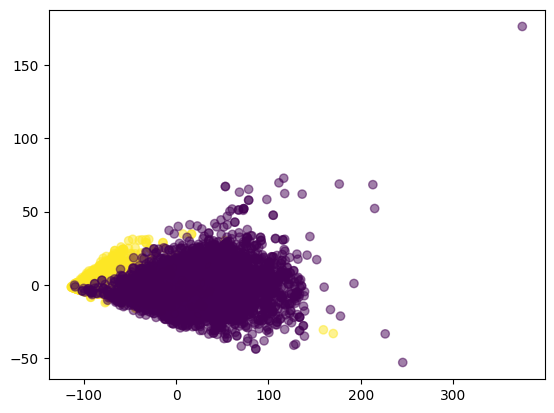

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.5)
plt.show()

Decomposition doesn't work well on this dataset. Let's try to use t-SNE.

c:\Users\nikit\anaconda3\envs\data_analytics\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\nikit\anaconda3\envs\data_analytics\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


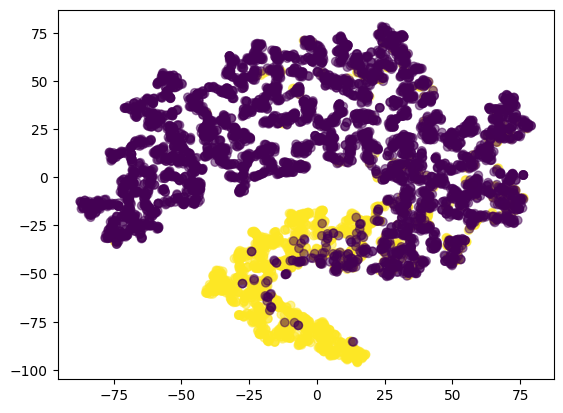

In [9]:
# t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, alpha=0.5)
plt.show()

t-SNE works better